In [2]:
# Import essential libraries #

import pandas as pd
import numpy as np
from numpy import percentile
import math
import datetime
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from functools import reduce
import warnings
from random import randint
import seaborn as sns
%matplotlib inline

warnings.filterwarnings(action='once')

In [3]:
# CSV_Formatter prepares a dataframe of values and a dataframe of percentages for each date of the fund's history. 
# It cleans the csv by isolating one measurement per day, at the Close of business, and then creating
# a shifted column for comparison and creating a column of the daily percent change in value. 
# Both daily value and percent change are retained in two separate dataframes. 

def CSV_Formatter (folder_name, filename):
    df_init = pd.read_csv('Downloads/' + str(folder_name) +'/' + str(filename) +'.csv')
    df = df_init.set_index('Date')[['Close']]
    df.columns = [str(filename)]
    df['Next Day Values'] = df[filename].shift(-1)
    df['Percentages'] = df['Next Day Values']/df[str(filename)]
    df_final = df[['Percentages']]
    df_final.columns = [str(filename)]
    return(df[[filename]], df_final)
    
def clean_label (labels):
    cleaned = str(labels).strip("Index'").replace("_y'", '').replace('Index([', '').replace(']', '').replace(
        ", dtype='object')", '').replace('[', '').replace("'", '').replace("_x'", '').replace('"', '')
    return cleaned

# The last function is a weekly master function which collects the percent changes week to week for a domain dataframe
# Domain dataframe should consist only of a date time index and a value series

def weekly_master(df):
    
# A little setup is necessary to ensure fidelity across weekly data.  In the original yahoo finance data downloads,
# Weekends and holidays are not counted in the Datetime Index.  The following code creates a working df that
# Can be broken into calendar weeks at regular 7 day intervals, to better reflect paycheck contributions and 
# subsequent analyses can be done on a week to week basis.

# Note that for days where data is unavailable, I've filled in the value 1, since the method of assessing portfolios
# Is multiplication across daily percentage changes.  In this way, days when no percent changes are documented do not
# affect the value of the investment.

    # NOTE THAT THIS FUNCTION WILL ONLY ACCOMODATE DATAFRAMES WITH UP TO 8 COLUMNS AS WRITTEN! #

    datelist = pd.to_datetime(df.index.values)
    df['Datetime'] = datelist
    df_timed = df.set_index('Datetime')
    labels = df_timed.columns

    df_segmented = pd.DataFrame(columns = labels)

    daterange = int(str(df_timed.index.max() - df_timed.index.min()).replace(" days 00:00:00", ''))
    all_dates = pd.date_range(df_timed.index.min(), periods=daterange).tolist()
    
    index_df = pd.DataFrame(all_dates)
    index_df.columns = ['Datetime']
    
    working_df = index_df.merge(df_timed, how = 'outer', left_on = 'Datetime', right_on ='Datetime')
    working_df = working_df.fillna(1).set_index('Datetime').sort_values('Datetime', ascending = False)

    days = len(working_df.index)
    number_of_weeks = int(np.floor(days/7))

    df_progress = pd.DataFrame(index=[0,1,2,3,4])
    weekly_eval = pd.DataFrame()

    for i in range(0, number_of_weeks):
        portfolio_segment = working_df.iloc[i*7:(i+1)*7]
        
        products =[]
        prod_1 = portfolio_segment.iloc[:, 0].product()
        products.append(prod_1)

        if len(labels) > 1:
            prod_2 = portfolio_segment.iloc[:, 1].product()
            products.append(prod_2)
        if len(labels) > 2:        
            prod_3 = portfolio_segment.iloc[:, 2].product()
            products.append(prod_3)
        if len(labels) > 3:
            prod_4 = portfolio_segment.iloc[:, 3].product()
            products.append(prod_4)
        if len(labels) > 4:
            prod_5 = portfolio_segment.iloc[:, 4].product()
            products.append(prod_5)
        if len(labels) > 5:
            prod_6 = portfolio_segment.iloc[:, 5].product()
            products.append(prod_6)
        if len(labels) > 6:
            prod_7 = portfolio_segment.iloc[:, 6].product()
            products.append(prod_7)
        if len(labels) > 7:
            prod_8 = portfolio_segment.iloc[:, 7].product()
            products.append(prod_8)
   
    # Can we just make this into a loop?
    # For j in range(0, len(labels)):
    #    temp_prod = portfolio_segment.iloc[:, j].product()
    #    products.append(temp_prod)


        weekly_eval[str(portfolio_segment.index[7-1]).replace("00:00:00", '')] = products
    
    weekly_eval = weekly_eval.T
    weekly_eval.columns = labels
    weekly_eval.index = pd.to_datetime(weekly_eval.index)
    weekly_eval.index.name = 'Date'
    weekly_eval.sort_index()

    return(weekly_eval)


In [4]:
# This Cell reads all necessary source files for STOCK INDICES #

(PREIX, PREIX_final) = CSV_Formatter('Stock_Indices', 'PREIX')
(FUSEX, FUSEX_final) = CSV_Formatter('Stock_Indices', 'FUSEX')
(SWPPX, SWPPX_final) = CSV_Formatter('Stock_Indices', 'SWPPX')
(VFINX, VFINX_final) = CSV_Formatter('Stock_Indices', 'VFINX')
(VIGRX, VIGRX_final) = CSV_Formatter('Stock_Indices', 'VIGRX')

# Creates dataframes of their daily values and daily percent changes , aka increments.
dfstock_values = [PREIX[['PREIX']], FUSEX[['FUSEX']], SWPPX[['SWPPX']], VFINX[['VFINX']], VIGRX[['VIGRX']]]
dfstock_finals = [PREIX_final, FUSEX_final, SWPPX_final, VFINX_final, VIGRX_final]
stock_daily_values_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), dfstock_values)
stock_increments_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), dfstock_finals)

stock_weekly = weekly_master(stock_increments_df)








In [5]:
# This Cell reads all necessary source files for Intermediate Term Bonds #

(BIV, BIV_final) = CSV_Formatter('Intermediate_Bonds', 'BIV')
(HYG, HYG_final) = CSV_Formatter('Intermediate_Bonds', 'HYG')
(IEF, IEF_final) = CSV_Formatter('Intermediate_Bonds', 'IEF')
(IEI, IEI_final) = CSV_Formatter('Intermediate_Bonds', 'IEI')
(IGIB, IGIB_final) = CSV_Formatter('Intermediate_Bonds', 'IGIB')
(IPE, IPE_final) = CSV_Formatter('Intermediate_Bonds', 'IPE')
(ITE, ITE_final) = CSV_Formatter('Intermediate_Bonds', 'ITE')
(TIP, TIP_final) = CSV_Formatter('Intermediate_Bonds', 'TIP')

# Creates dataframes of their daily values and daily percent changes , aka increments.
df_itb_values = [BIV[['BIV']], HYG[['HYG']], IEF[['IEF']], IEI[['IEI']], IGIB[['IGIB']], IPE[['IPE']], ITE[['ITE']], TIP[['TIP']]]
df_itb_finals = [BIV_final, HYG_final, IEF_final, IEI_final, IGIB_final, IPE_final, ITE_final, TIP_final]
itb_daily_values_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), df_itb_values)
itb_increments_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), df_itb_finals)

itb_weekly = weekly_master(itb_increments_df)


In [6]:
# This Cell reads all necessary source files for Long Term Bonds #

(PRULX, PRULX_final) = CSV_Formatter('Long_Term_Bonds', 'PRULX')
(VUSTX, VUSTX_final) = CSV_Formatter('Long_Term_Bonds', 'VUSTX')
(WHOSX, WHOSX_final) = CSV_Formatter('Long_Term_Bonds', 'WHOSX')

# Creates dataframes of their daily values and daily percent changes , aka increments.
df_ltb_values = [PRULX[['PRULX']], VUSTX[['VUSTX']], WHOSX[['WHOSX']]]
df_ltb_finals = [PRULX_final, VUSTX_final, WHOSX_final]
ltb_daily_values_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), df_ltb_values)
ltb_increments_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), df_ltb_finals)

ltb_weekly = weekly_master(ltb_increments_df)




In [7]:
# This Cell reads all necessary source files for Gold 

(INIVX, INIVX_final) = CSV_Formatter('Gold', 'INIVX')
(OPGSX, OPGSX_final) = CSV_Formatter('Gold', 'OPGSX')
(SGGDX, SGGDX_final) = CSV_Formatter('Gold', 'SGGDX')
(USERX, USERX_final) = CSV_Formatter('Gold', 'USERX')
(VGPMX, VGPMX_final) = CSV_Formatter('Gold', 'VGPMX')

# Creates dataframes of their daily values and daily percent changes , aka increments.
dfgold_values = [INIVX[['INIVX']], OPGSX[['OPGSX']], SGGDX[['SGGDX']], USERX[['USERX']], VGPMX[['VGPMX']]]
dfgold_finals = [INIVX_final, OPGSX_final, SGGDX_final, USERX_final, VGPMX_final]
gold_daily_values_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), dfgold_values)
gold_increments_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), dfgold_finals)

gold_weekly = weekly_master(gold_increments_df)


In [8]:
# This Cell reads all necessary source files from their respective download folders for Broad Basket Commodities #

(DBC, DBC_final) = CSV_Formatter('Broad_Commodities', 'DBC')
(DJP, DJP_final) = CSV_Formatter('Broad_Commodities', 'DJP')
(GSG, GSG_final) = CSV_Formatter('Broad_Commodities', 'GSG')
(GSP, GSP_final) = CSV_Formatter('Broad_Commodities', 'GSP')

# Creates dataframes of their daily values and daily percent changes , aka increments.
df_commod_values = [DBC[['DBC']], DJP[['DJP']], GSG[['GSG']], GSP[['GSP']]]
df_commod_finals = [DBC_final, DJP_final, GSG_final, GSP_final]
commod_daily_values_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), df_commod_values)
commod_increments_df = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), df_commod_finals)

commod_weekly = weekly_master(commod_increments_df)


In [9]:
# This cell creates a function to randomly select the funds in the initial portfolio #

def random_all_weather(stock, inter_bond, long_bond, gold, commod):
    
    # First, select a fund from each investment category
    stock_choice = stock.sample(axis=1).columns
    inter_choice = inter_bond.sample(axis=1).columns
    long_bond_choice = long_bond.sample(axis=1).columns
    gold_choice = gold.sample(axis=1).columns
    commod_choice = commod.sample(axis=1).columns
    
    # Extract the columns of percent changes from the df
    rand_stock_inc = stock_weekly[stock_choice]
    rand_inter_bond_inc = itb_weekly[inter_choice]
    rand_long_bond_inc = ltb_weekly[long_bond_choice]
    rand_gold_inc = gold_weekly[gold_choice]
    rand_commod_inc = commod_weekly[commod_choice]

    random_inc = rand_stock_inc.merge(
        rand_inter_bond_inc, on = 'Date').merge(
        rand_long_bond_inc, on = 'Date').merge(
        rand_gold_inc, on = 'Date').merge(
        rand_commod_inc, on = 'Date')
    
    # Return a portfolio of randomly sampled funds, one in each category, starting at the first date all 5 had value.
    # Please note that the .dropna() here will restrict the amount of historical data leveraged in each portfolio.
    portfolio = random_inc.dropna()
    
    return portfolio



In [10]:
# This is just a test of the random portfolio generating function.

test_random_portfolio = random_all_weather(stock_daily_values_df, 
                   itb_daily_values_df, 
                   ltb_daily_values_df, 
                   gold_daily_values_df, 
                   commod_daily_values_df)
#test_random_portfolio.head()
#test_random_portfolio.tail()


In [11]:
# Now that we have a randomized portfolio, let's develop some tools to help us understand it.

# Time weighted return captures an accurate total return, accounting for time of accrual.

def time_weighted_return (df):
    sorted_df = df.sort_index(ascending=True).dropna()
    sorted_df['after_cash_flows'] = sorted_df.ending_value + sorted_df.cash_flows
    sorted_df['prev_after_cash_flows'] = sorted_df.after_cash_flows.shift(1)
    sorted_df['HPR'] = (sorted_df.ending_value / sorted_df.prev_after_cash_flows) - 1
    sorted_df['HPR_plus_one'] = sorted_df.HPR + 1
    sorted_df = sorted_df.dropna()

    rate = sorted_df.HPR_plus_one.product()-1
    
    return (rate)
 
# This function is used to compute the Compounded Annual Growth Rate and return the identities and length of investment

def p_summary(performance, fund_identities, term_years):
    twr = time_weighted_return(performance)
    CAGR = (float((1+twr))**(float(1/term_years)) -1)
    return(CAGR, fund_identities, term_years)

#  This function provides a line plot of the portfolio across its length in years.

def p_grapher(test_df):
    test_df['Portfolio Values'] = test_df.sum(axis = 1)
    to_plot = test_df.sort_index(ascending = True)
    return(to_plot.plot(kind = 'line', y = 'Portfolio Values', color='#0504aa').format_xdata(years))

    

In [11]:
# This cell adds a periodic contribution and rebalancing along the user specified proportions #

def periodic_rebalance_tester(invesment_stock, 
                              invesment_itb, 
                              invesment_ltb, 
                              invesment_gold, 
                              invesment_commod, 
                              contribution, 
                              interval):

    test = random_all_weather(stock_daily_values_df, 
                              itb_daily_values_df, 
                              ltb_daily_values_df, 
                              gold_daily_values_df, 
                              commod_daily_values_df).dropna()

    test = test.sort_index(ascending = True)
    test_col = test.iloc[:, 0:5]
    num_weeks = test_col.shape[0]
    number_of_periods = int(np.floor(num_weeks/interval))
    
    
    # This block sets markers in the test dataframe for when to add contributions and when to rebalance.
    a = np.empty((num_weeks,))
    a[::2] = 0
    a[1::2] = 1
    a = a*contribution
    total_contributions = np.asarray(a).sum()
    b = np.zeros((num_weeks,))
    b[:b.size:interval] = 1
    test_col['contributions'] = a
    test_col['rebalance_y/n'] = b

    # This block determines the proportions that are targets for rebalancing
    invesment = invesment_stock + invesment_itb + invesment_ltb + invesment_gold + invesment_commod
    inc_stock = invesment_stock / invesment
    inc_itb = invesment_itb / invesment
    inc_ltb = invesment_ltb / invesment
    inc_gold = invesment_gold / invesment
    inc_commod = invesment_commod / invesment
    
    
    values = test_col.values

    # Progress lists are used to accumulate the values of the incremented investments
    progress_stock = []
    progress_itb = []
    progress_ltb = []
    progress_gold = []
    progress_commod = []
    random_labels = test.iloc[:, 0:5]
    test_labels = str(random_labels.columns)
    fund_identities = str(test_labels).strip('Index').replace('_x', '').replace('([', '').replace("], dtype='object')", '')
    
    # This loop applies the increments to the investment amounts, and appends the results to the progress lists
    
    for i,j,k, l, m, n, rebal in values:
        invesment_stock = invesment_stock*i + n*inc_stock
        invesment_itb = invesment_itb*j + n*inc_itb
        invesment_ltb = invesment_ltb*k + n*inc_ltb
        invesment_gold = invesment_gold*l + n*inc_gold
        invesment_commod = invesment_commod*m + n*inc_commod
    
        if rebal == 1:
            subtotal = invesment_stock + invesment_itb + invesment_ltb + invesment_gold + invesment_commod
            invesment_stock = subtotal*inc_stock
            invesment_itb = subtotal*inc_itb
            invesment_ltb = subtotal*inc_ltb
            invesment_gold = subtotal*inc_gold
            invesment_commod = subtotal*inc_commod
    
        progress_stock.append(invesment_stock)
        progress_itb.append(invesment_itb)
        progress_ltb.append(invesment_ltb)
        progress_gold.append(invesment_gold)
        progress_commod.append(invesment_commod)
    
    # Lists are converted to arrays, and placed into a performace dataframe, which is evaluated for annualized return %
    result_stock = np.array(progress_stock)
    result_itb = np.array(progress_itb)
    result_ltb = np.array(progress_ltb)
    result_gold = np.array(progress_gold)
    result_commod = np.array(progress_commod)

    test['Stock_Eval'] = result_stock
    test['ITB_Eval']= result_itb
    test['LTB_Eval'] = result_ltb
    test['Gold_Eval'] = result_gold
    test['Commod_Eval']= result_commod

    performance = test.iloc[:, 5:10]
    performance['ending_value'] = performance.sum(axis=1)
    performance['cash_flows'] = a
    performance['rebalanced'] = b
    performance = performance.sort_index(ascending = False)
    term_years = float(len(performance.index)/52.17857)
 
    return (performance, fund_identities, term_years)


/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'Value ($)')

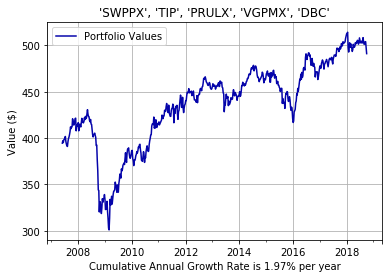

In [494]:
# Here is a visual of an All Weather portfolio with no recurring contributions.  Note it is very much at the mercy
# of the market and experiences a lot of volatility.

test_df, test_identities, test_years = (periodic_rebalance_tester(60, 80, 30, 15, 15, 0, 26))
CAGR, identities, years = p_summary(test_df, test_identities, test_years)

statement = "Cumulative Annual Growth Rate is " + str(round(CAGR * 100, 2)) + '% per year'

p_grapher(test_df)
plt.title(identities)
plt.grid(axis = 'both')
plt.xlabel(statement)
plt.ylabel('Value ($)')

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'Value ($)')

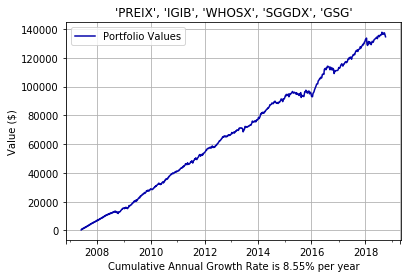

In [412]:
# Here is a similar All Weather portfolio, but now wih a recurring $200 contribution every two weeks.

test_df, test_identities, test_years = (periodic_rebalance_tester(60, 80, 30, 15, 15, 200, 26))
CAGR, identities, years = p_summary(test_df, test_identities, test_years)

statement = "Cumulative Annual Growth Rate is " + str(round(CAGR * 100, 2)) + '% per year'

p_grapher(test_df)
plt.title(identities)
plt.grid(axis = 'both')
plt.xlabel(statement)
plt.ylabel('Value ($)')


/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


95% of trials fall between 7.34 and 9.96 Annualized Return over 11.36 years.


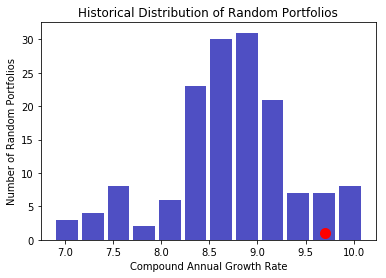

In [542]:
# Now, let's develop some distributions based on the All_Weather Portfolio and let's rebalance every k days
# Here, we see the advice recommended in the book for an All Weather Portfolio.  
# Note that with the following inputs: (300, 400, 150, 75, 75, 1000, 25)
# Note the percentage at the end determines the number of portfolios with a CAGR above 9 from the sample


all_rois = []
all_labels = []

for i in range(150):
    (test_df, test_label, years) = periodic_rebalance_tester(60, 80, 30, 15, 15, 200, 26)
    CAGR, identities, years = p_summary(test_df, test_identities, test_years)
    
    test_roi = round(CAGR*100, 2)
    all_rois.append(test_roi)
    all_labels.append(test_label)
    
roi_array = np.array(all_rois)

d = {'ROI':all_rois, 'Funds':all_labels}

sample_space = pd.DataFrame(data = d)
success_space = sample_space.sort_values(by = ['ROI'], ascending=False).head(10)
message = clean_label(success_space.values)

plt.hist(all_rois, bins = 12, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Compound Annual Growth Rate')
plt.ylabel('Number of Random Portfolios')
plt.title('Historical Distribution of Random Portfolios')
plt.plot([9.7],[1], 'ro', markersize = 10)

statement = '95% of trials fall between ' + str(round(np.percentile(roi_array, 2.5), (2))) + ' and ' + str(round(np.percentile(roi_array,97.5), 2)) + ' Annualized Return over ' + str(round(years, 2)) + ' years.'
    
print(statement)

#percent_above_9 = round(((roi_array > 9).sum())/len(roi_array),2)
#print(percent_above_9)

In [544]:
print('Top performing portfolios: ')
print(message)

Top performing portfolios: 
10.09 VIGRX, IEF, WHOSX, INIVX, GSG
 10.08 VIGRX, IEF, WHOSX, SGGDX, GSG
 10.05 VIGRX, IEF, VUSTX, USERX, DBC
 10.0 VIGRX, IEF, WHOSX, USERX, GSG
 9.94 VIGRX, IEI, PRULX, SGGDX, DBC
 9.84 VIGRX, IEF, PRULX, SGGDX, DJP
 9.84 VIGRX, IEF, VUSTX, SGGDX, DJP
 9.84 VIGRX, IPE, WHOSX, SGGDX, DBC
 9.78 VIGRX, IEI, WHOSX, VGPMX, DBC
 9.64 VIGRX, ITE, PRULX, INIVX, DBC


In [14]:
# This function flips the order of weekly percent changes for each fund, moving the Great Recession closer to the 
# end of the tested historical data.  This might be important to study, as the loss in stock value will be more
# dearly felt when there is a larger amount of money in that fund.

def reverser(df):
    df_reversed = df.iloc[::-1]
    df_reversed['Reverse_Index']= df.index
    df_reversed = df_reversed.set_index('Reverse_Index')
    df_reversed.index.names = ['Date']
    return df_reversed

r_stock = reverser(stock_weekly)
r_itb = reverser(itb_weekly)
r_ltb = reverser(ltb_weekly)
r_gold = reverser(gold_weekly)
r_commod = reverser(commod_weekly)


def reverse_rebalancer(invesment_stock, 
                              invesment_itb, 
                              invesment_ltb, 
                              invesment_gold, 
                              invesment_commod, 
                              contribution, 
                              interval):

     # First, select a fund from each investment category
    stock_choice = r_stock.sample(axis=1).columns
    inter_choice = r_itb.sample(axis=1).columns
    long_bond_choice = r_ltb.sample(axis=1).columns
    gold_choice = r_gold.sample(axis=1).columns
    commod_choice = r_commod.sample(axis=1).columns
    
    # Extract the columns of percent changes from the df
    rand_stock_inc = r_stock[stock_choice]
    rand_inter_bond_inc = r_itb[inter_choice]
    rand_long_bond_inc = r_ltb[long_bond_choice]
    rand_gold_inc = r_gold[gold_choice]
    rand_commod_inc = r_commod[commod_choice]

    random_inc = rand_stock_inc.merge(
        rand_inter_bond_inc, on = 'Date').merge(
        rand_long_bond_inc, on = 'Date').merge(
        rand_gold_inc, on = 'Date').merge(
        rand_commod_inc, on = 'Date')
    
    test = random_inc.dropna()
    test = test.sort_index(ascending = True)
    test_col = test.iloc[:, 0:5]
    num_weeks = test_col.shape[0]
    number_of_periods = int(np.floor(num_weeks/interval))
    
    
    # This block sets markers in the test dataframe for when to add contributions and when to rebalance.
    a = np.empty((num_weeks,))
    a[::2] = 0
    a[1::2] = 1
    a = a*contribution
    total_contributions = np.asarray(a).sum()
    b = np.zeros((num_weeks,))
    b[:b.size:interval] = 1
    test_col['contributions'] = a
    test_col['rebalance_y/n'] = b

    # This block determines the proportions that are targets for rebalancing
    invesment = invesment_stock + invesment_itb + invesment_ltb + invesment_gold + invesment_commod
    inc_stock = invesment_stock / invesment
    inc_itb = invesment_itb / invesment
    inc_ltb = invesment_ltb / invesment
    inc_gold = invesment_gold / invesment
    inc_commod = invesment_commod / invesment
    
    
    values = test_col.values

    # Progress lists are used to accumulate the values of the incremented investments
    progress_stock = []
    progress_itb = []
    progress_ltb = []
    progress_gold = []
    progress_commod = []
    random_labels = test.iloc[:, 0:5]
    test_labels = str(random_labels.columns)
    fund_identities = str(test_labels).strip('Index').replace('_x', '').replace('([', '').replace("], dtype='object')", '')
    
    # This loop applies the increments to the investment amounts, and appends the results to the progress lists
    
    for i,j,k, l, m, n, rebal in values:
        invesment_stock = invesment_stock*i + n*inc_stock
        invesment_itb = invesment_itb*j + n*inc_itb
        invesment_ltb = invesment_ltb*k + n*inc_ltb
        invesment_gold = invesment_gold*l + n*inc_gold
        invesment_commod = invesment_commod*m + n*inc_commod
    
        if rebal == 1:
            subtotal = invesment_stock + invesment_itb + invesment_ltb + invesment_gold + invesment_commod
            invesment_stock = subtotal*inc_stock
            invesment_itb = subtotal*inc_itb
            invesment_ltb = subtotal*inc_ltb
            invesment_gold = subtotal*inc_gold
            invesment_commod = subtotal*inc_commod
    
        progress_stock.append(invesment_stock)
        progress_itb.append(invesment_itb)
        progress_ltb.append(invesment_ltb)
        progress_gold.append(invesment_gold)
        progress_commod.append(invesment_commod)
    
    # Lists are converted to arrays, and placed into a performace dataframe, which is evaluated for annualized return %
    result_stock = np.array(progress_stock)
    result_itb = np.array(progress_itb)
    result_ltb = np.array(progress_ltb)
    result_gold = np.array(progress_gold)
    result_commod = np.array(progress_commod)

    test['Stock_Eval'] = result_stock
    test['ITB_Eval']= result_itb
    test['LTB_Eval'] = result_ltb
    test['Gold_Eval'] = result_gold
    test['Commod_Eval']= result_commod

    performance = test.iloc[:, 5:10]
    performance['ending_value'] = performance.sum(axis=1)
    performance['cash_flows'] = a
    performance['rebalanced'] = b
    performance = performance.sort_index(ascending = False)
    term_years = float(len(performance.index)/52.17857)
 
    return (performance, fund_identities, term_years)


/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'Value ($)')

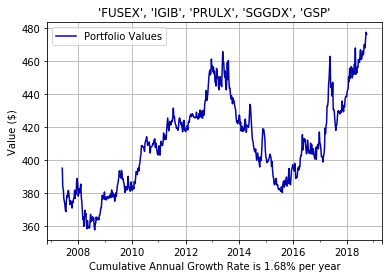

In [496]:
# Similar to what was above.  We examine the volatility associated with the downturn in late 2013

test_df, test_identities, test_years = (reverse_rebalancer(60, 80, 30, 15, 15, 0, 26))
CAGR, identities, years = p_summary(test_df, test_identities, test_years)

statement = "Cumulative Annual Growth Rate is " + str(round(CAGR * 100, 2)) + '% per year'

p_grapher(test_df)
plt.title(identities)
plt.grid(axis = 'both')
plt.xlabel(statement)
plt.ylabel('Value ($)')

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'Value ($)')

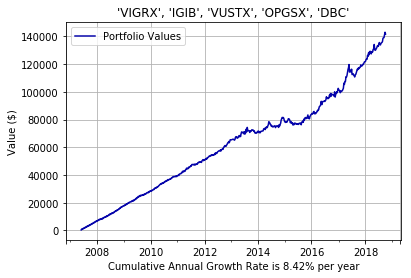

In [380]:
# Here, the monthly contribution helps dampen the volatility, but it is still evident that the portfolio
# begins to struggle in late 2013

test_df, test_identities, test_years = (reverse_rebalancer(60, 80, 30, 15, 15, 200, 25))
CAGR, identities, years = p_summary(test_df, test_identities, test_years)

statement = "Cumulative Annual Growth Rate is " + str(round(CAGR * 100, 2)) + '% per year'

p_grapher(test_df)
plt.title(identities)
plt.grid(axis = 'both')
plt.xlabel(statement)
plt.ylabel('Value ($)')

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


95% of trials fall between 7.32 and 8.94 Annualized Return over 11.36 years.


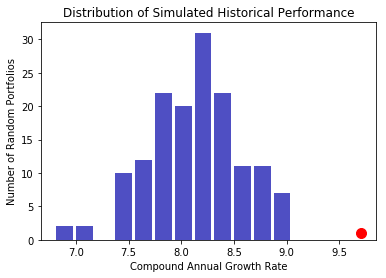

In [545]:
# For good measure, let's see how the portfolio's faired under the reverse historical data.

all_rois = []
all_labels = []

for i in range(150):
    (test_df, test_label, years) = reverse_rebalancer(60, 80, 30, 15, 15, 200, 25)
    CAGR, identities, years = p_summary(test_df, test_identities, test_years)
    
    test_roi = round(CAGR*100, 2)
    all_rois.append(test_roi)
    all_labels.append(test_label)
    
roi_array = np.array(all_rois)

d = {'ROI':all_rois, 'Funds':all_labels}

sample_space = pd.DataFrame(data = d)
success_space = sample_space.sort_values(by = ['ROI'], ascending=False).head(10)
message = clean_label(success_space.values)

plt.hist(all_rois, bins = 12, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Compound Annual Growth Rate')
plt.ylabel('Number of Random Portfolios')
plt.title('Distribution of Simulated Historical Performance')
plt.plot([9.7],[1], 'ro', markersize = 10)

print('95% of trials fall between ' + 
      str(round(np.percentile(roi_array, 2.5), (2))) + 
      ' and ' + str(round(np.percentile(roi_array,97.5), 2)) + 
      ' Annualized Return over ' + str(round(years, 2)) + ' years.')


#percent_above_9 = round(((roi_array > 9).sum())/len(roi_array),2)

#print(percent_above_9)

In [546]:
print('Top performing portfolios: ')
print(message)

Top performing portfolios: 
9.05 SWPPX, IEF, PRULX, VGPMX, DBC
 8.99 VIGRX, IEF, VUSTX, OPGSX, DBC
 8.95 PREIX, IEF, WHOSX, VGPMX, DBC
 8.95 VFINX, IEF, WHOSX, OPGSX, DBC
 8.94 VFINX, IEF, VUSTX, VGPMX, DBC
 8.89 SWPPX, IEI, WHOSX, OPGSX, DBC
 8.87 VIGRX, IEI, PRULX, SGGDX, DBC
 8.81 SWPPX, IEF, WHOSX, OPGSX, DJP
 8.79 PREIX, IEI, WHOSX, VGPMX, DBC
 8.78 SWPPX, IEF, VUSTX, SGGDX, GSP


In [470]:

# This cell runs a simulation given an initial contribution amount and user-specified proportions for each category.#
# It then selects a rebalance period and biweekly contribution at random.  It then runs both forward an reverse tests #
# records the identities, rebal period, contribution, and averages the CAGR's in a new dataframe #



#Set contribution proportions and 'dummy row' for the export dataframe
stock_prop, itb_prop, ltb_prop, gold_prop, commod_prop = .30, .40, .15, .075, .075
export_df = pd.DataFrame()

for i in range(0,5000):
    #Select random rebalace interval between a weekly rebalance and an annual rebalance
    rebal = randint(1,52)

    #Select contribution level randomly between $100 and $1000 every two weeks
    con = randint(2,20)*50

    #Set breakdown of biweekly contributions
    stockz = con*stock_prop
    itbz = con*itb_prop
    ltbz = con*ltb_prop
    goldz = con*gold_prop
    commodz = con*commod_prop

    #Run the forward eval
    forward_df, forward_label, forward_years = periodic_rebalance_tester(stockz, itbz, ltbz, goldz, commodz, con, rebal)
    for_CAGR, for_identities, for_years = p_summary(forward_df, forward_label, forward_years)

    #Run the reverse eval
    backward_df, backward_label, backward_years = reverse_rebalancer(stockz, itbz, ltbz, goldz, commodz, con, rebal)
    back_CAGR, back_identities, back_years = p_summary(backward_df, backward_label, backward_years)

    #Get the Average CAGR
    avg_CAGR = (for_CAGR + back_CAGR)/2

    #Assemble the row for export
    export_df = export_df.append(pd.Series([forward_label, round(avg_CAGR*100, 2), rebal, con]), ignore_index = True)

#Clean the explorted dataframe

export_df.columns = ['Portfolio', 'Estimated_Annual_Return', 'Weeks_until_Rebalance', 'Biweekly_Contribution']
export_df = export_df.sort_values(['Estimated_Annual_Return', 'Biweekly_Contribution'], ascending = [False, True])


# Note that this cell has been run multiple times since the inception of the code, with alternative proportions
# The results are further analyzed in a subsequent cell, the dataframes are appended with the new analyses, and then
# pushed to csv files for reference.  This simulation is one part of a very time intensive process.

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [448]:
# Let's take a closer look at those funds which had the best rates of return, even at low contributions.
# Would higher contributions affect them adversely?  One would think they wouldn't do much better, if the simulation
# had a larger enough sample size.

# This function develops the WEIGHTED CAGR which will be used for assembling the master data set for this project #

def specific_tester(stock_name, itb_name, ltb_name, gold_name, commod_name, 
                    stock_prop, itb_prop, ltb_prop, gold_prop, commod_prop, contribution, interval):

    # Extract the columns of percent changes from the forward facing df
    rand_stock_inc = stock_weekly[[stock_name]]
    rand_inter_bond_inc = itb_weekly[[itb_name]]
    rand_long_bond_inc = ltb_weekly[[ltb_name]]
    rand_gold_inc = gold_weekly[[gold_name]]
    rand_commod_inc = commod_weekly[[commod_name]]

    random_inc = rand_stock_inc.merge(
        rand_inter_bond_inc, on = 'Date').merge(
        rand_long_bond_inc, on = 'Date').merge(
        rand_gold_inc, on = 'Date').merge(
        rand_commod_inc, on = 'Date')
    
    # Return a portfolio of randomly sampled funds, one in each category, starting at the first date all 5 had value.
    # Please note that the .dropna() here will restrict the amount of historical data leveraged in each portfolio.
    test = random_inc.dropna()
    
    test = test.sort_index(ascending = True)
    test_col = test.iloc[:, 0:5]
    num_weeks = test_col.shape[0]
    number_of_periods = int(np.floor(num_weeks/interval))

        
    # This block sets markers in the test dataframe for when to add contributions and when to rebalance.
    a = np.empty((num_weeks,))
    a[::2] = 0
    a[1::2] = 1
    a = a*contribution
    total_contributions = np.asarray(a).sum()
    b = np.zeros((num_weeks,))
    b[:b.size:interval] = 1
    test_col['contributions'] = a
    test_col['rebalance_y/n'] = b

    # This block determines the proportions that are targets for rebalancing
    inc_stock = stock_prop
    inc_itb = itb_prop
    inc_ltb = ltb_prop
    inc_gold = gold_prop
    inc_commod = commod_prop
    
    invesment_stock = contribution*inc_stock
    invesment_itb = contribution*inc_itb
    invesment_ltb = contribution*inc_ltb
    invesment_gold = contribution*inc_gold
    invesment_commod = contribution*inc_commod
    
    values = test_col.values

    # Progress lists are used to accumulate the values of the incremented investments
    progress_stock = []
    progress_itb = []
    progress_ltb = []
    progress_gold = []
    progress_commod = []
    random_labels = test.iloc[:, 0:5]
    test_labels = str(random_labels.columns)
    fund_identities = str(test_labels).strip('Index').replace('_x', '').replace('([', '').replace("], dtype='object')", '')
    
    # This loop applies the increments to the investment amounts, and appends the results to the progress lists
    
    for i,j,k, l, m, n, rebal in values:
        invesment_stock = invesment_stock*i + n*inc_stock
        invesment_itb = invesment_itb*j + n*inc_itb
        invesment_ltb = invesment_ltb*k + n*inc_ltb
        invesment_gold = invesment_gold*l + n*inc_gold
        invesment_commod = invesment_commod*m + n*inc_commod
    
        if rebal == 1:
            subtotal = invesment_stock + invesment_itb + invesment_ltb + invesment_gold + invesment_commod
            invesment_stock = subtotal*inc_stock
            invesment_itb = subtotal*inc_itb
            invesment_ltb = subtotal*inc_ltb
            invesment_gold = subtotal*inc_gold
            invesment_commod = subtotal*inc_commod
    
        progress_stock.append(invesment_stock)
        progress_itb.append(invesment_itb)
        progress_ltb.append(invesment_ltb)
        progress_gold.append(invesment_gold)
        progress_commod.append(invesment_commod)
    
    # Lists are converted to arrays, and placed into a performace dataframe, which is evaluated for annualized return %
    result_stock = np.array(progress_stock)
    result_itb = np.array(progress_itb)
    result_ltb = np.array(progress_ltb)
    result_gold = np.array(progress_gold)
    result_commod = np.array(progress_commod)

    test['Stock_Eval'] = result_stock
    test['ITB_Eval']= result_itb
    test['LTB_Eval'] = result_ltb
    test['Gold_Eval'] = result_gold
    test['Commod_Eval']= result_commod

    performance = test.iloc[:, 5:10]
    performance['ending_value'] = performance.sum(axis=1)
    performance['cash_flows'] = a
    performance['rebalanced'] = b
    f_performance = performance.sort_index(ascending = False)
    term_years = float(len(f_performance.index)/52.17857)

    
    for_CAGR, for_identities, for_years = p_summary(f_performance, fund_identities, term_years)
    
    # Extract the columns of percent changes from the r_df's
    rand_stock_inc = r_stock[[stock_name]]
    rand_inter_bond_inc = r_itb[[itb_name]]
    rand_long_bond_inc = r_ltb[[ltb_name]]
    rand_gold_inc = r_gold[[gold_name]]
    rand_commod_inc = r_commod[[commod_name]]
                  
    random_inc = rand_stock_inc.merge(
        rand_inter_bond_inc, on = 'Date').merge(
        rand_long_bond_inc, on = 'Date').merge(
        rand_gold_inc, on = 'Date').merge(
        rand_commod_inc, on = 'Date')
    
    # Return a portfolio of randomly sampled funds, one in each category, starting at the first date all 5 had value.
    # Please note that the .dropna() here will restrict the amount of historical data leveraged in each portfolio.
    test = random_inc.dropna()
    
    test = test.sort_index(ascending = True)
    test_col = test.iloc[:, 0:5]
    num_weeks = test_col.shape[0]
    number_of_periods = int(np.floor(num_weeks/interval))

        
    # This block sets markers in the test dataframe for when to add contributions and when to rebalance.
    a = np.empty((num_weeks,))
    a[::2] = 0
    a[1::2] = 1
    a = a*contribution
    total_contributions = np.asarray(a).sum()
    b = np.zeros((num_weeks,))
    b[:b.size:interval] = 1
    test_col['contributions'] = a
    test_col['rebalance_y/n'] = b

    # This block determines the proportions that are targets for rebalancing
    inc_stock = stock_prop
    inc_itb = itb_prop
    inc_ltb = ltb_prop
    inc_gold = gold_prop
    inc_commod = commod_prop
    
    invesment_stock = contribution*inc_stock
    invesment_itb = contribution*inc_itb
    invesment_ltb = contribution*inc_ltb
    invesment_gold = contribution*inc_gold
    invesment_commod = contribution*inc_commod
    
    values = test_col.values

    # Progress lists are used to accumulate the values of the incremented investments
    progress_stock = []
    progress_itb = []
    progress_ltb = []
    progress_gold = []
    progress_commod = []
    random_labels = test.iloc[:, 0:5]
    test_labels = str(random_labels.columns)
    fund_identities = str(test_labels).strip('Index').replace('_x', '').replace('([', '').replace("], dtype='object')", '')
    
    # This loop applies the increments to the investment amounts, and appends the results to the progress lists
    
    for i,j,k, l, m, n, rebal in values:
        invesment_stock = invesment_stock*i + n*inc_stock
        invesment_itb = invesment_itb*j + n*inc_itb
        invesment_ltb = invesment_ltb*k + n*inc_ltb
        invesment_gold = invesment_gold*l + n*inc_gold
        invesment_commod = invesment_commod*m + n*inc_commod
    
        if rebal == 1:
            subtotal = invesment_stock + invesment_itb + invesment_ltb + invesment_gold + invesment_commod
            invesment_stock = subtotal*inc_stock
            invesment_itb = subtotal*inc_itb
            invesment_ltb = subtotal*inc_ltb
            invesment_gold = subtotal*inc_gold
            invesment_commod = subtotal*inc_commod
    
        progress_stock.append(invesment_stock)
        progress_itb.append(invesment_itb)
        progress_ltb.append(invesment_ltb)
        progress_gold.append(invesment_gold)
        progress_commod.append(invesment_commod)
    
    # Lists are converted to arrays, and placed into a performace dataframe, which is evaluated for annualized return %
    result_stock = np.array(progress_stock)
    result_itb = np.array(progress_itb)
    result_ltb = np.array(progress_ltb)
    result_gold = np.array(progress_gold)
    result_commod = np.array(progress_commod)

    test['Stock_Eval'] = result_stock
    test['ITB_Eval']= result_itb
    test['LTB_Eval'] = result_ltb
    test['Gold_Eval'] = result_gold
    test['Commod_Eval']= result_commod

    performance = test.iloc[:, 5:10]
    performance['ending_value'] = performance.sum(axis=1)
    performance['cash_flows'] = a
    performance['rebalanced'] = b
    b_performance = performance.sort_index(ascending = False)
    term_years = float(len(b_performance.index)/52.17857)

    back_CAGR, back_identities, back_years = p_summary(b_performance, fund_identities, term_years)
    low_CAGR = min(for_CAGR, back_CAGR)
    high_CAGR = max(for_CAGR, back_CAGR)
    mean_CAGR = round((back_CAGR + for_CAGR)/2*100, 2)
    CAGR_range = str(round(low_CAGR*100, 2)) + ' to ' + str(round(high_CAGR*100, 2))
    
    return (f_performance, b_performance, mean_CAGR, CAGR_range, for_identities, for_years)

# This function is helpful for removing unusually large gains from the list of typical 52 week returns that will be 
# created in the next cell.  It does not affect large losses due to the heavily right-skew distributions in the
# CAGR distributions.

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
    


In [471]:
# This cell develops a list of 52 week returns for each row of the dataframe fed to it.  
# It then determines the min and max returns (minus any occuring outlier gains)
# The typical return range is the middle 90% returns in all 52 week periods
# The results of this cell (as written with 5000 resamples) has been exported as 5000_All_Weather.csv
# This cell is the second part of the process for forming resampled dataframes for further study
# It is not recommended that an observer run this cell without having ample time (6 to 7 hours) to let it 
# complete its work.

num_rows = results_df.shape[0]
listing = []

for j in range(results_df.shape[0]):
    # Separate the fund names so they can be used as inputs
    funds = results_df.Portfolio[j].replace("'", "").replace(' ','').split(',')
    stock_id = funds[0]
    itb_id = funds[1]
    ltb_id = funds[2]
    gold_id = funds[3]
    commod_id = funds[4]

    # identify rebal, contribution
    rebal = results_df.Weeks_until_Rebalance[j]
    contribution = results_df.Biweekly_Contribution[j]

    f_df, b_df, CAGR_mean, CAGR_range, ident, years = specific_tester(
        stock_id, itb_id, ltb_id, gold_id, commod_id, .30, .40, .15, .075, .075, contribution, int(rebal))

    number_of_weeks = f_df.shape[0]
    summaries = []

    for i in range(0, number_of_weeks-52):
        selection = f_df.iloc[i:i+51, :]
        CAGR, identities, length = p_summary(selection, ident, 1)
        summaries = np.append(summaries, round(CAGR*100,2))

    modified = reject_outliers(summaries)
    CAGR_range =  str(round(np.percentile(modified, 5), (2))) + ' to ' + str(round(np.percentile(modified,95), 2))
    
    
    listing.append([min(modified), max(modified), CAGR_range])

    placeholder = pd.DataFrame(listing, columns = ['Worst_Year', 'Best_Year', 'Typical_Returns'])

result = pd.concat([results_df, placeholder], axis=1, join='inner')

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [548]:
# This cell cleans the resulting dataframe and then exports it to a csv file

data_set = result[['Portfolio', 'Weeks_until_Rebalance', 'Biweekly_Contribution', 'Worst_Year', 
                   'Best_Year', 'Estimated_Annual_Return', 'Typical_Returns']]
data_set = data_set.sort_values(['Estimated_Annual_Return', 'Biweekly_Contribution', 'Worst_Year'], 
                                ascending = [False, True, True])

#Note that here, Typical Returns refer to the middle 90% returns in a given 52 week period
data_set.head()

data_set.to_csv('5000 All_weather portfolios.csv')
#data_set.to_csv('5000 60_10_10_10_10 portfolios')
#data_set.to_csv('5000 15_35_25_12.5_12.5 portfolios')

In [551]:
# Read this csv to load the All Weather Portfolios for the next several cell analysis
data_set = pd.read_csv('5000 All_weather portfolios.csv')
data_set = data_set[['Portfolio', 'Weeks_until_Rebalance', 'Biweekly_Contribution', 'Worst_Year', 
                   'Best_Year', 'Estimated_Annual_Return', 'Typical_Returns']]
data_set = data_set.sort_values(['Estimated_Annual_Return', 'Biweekly_Contribution', 'Worst_Year'], 
                                ascending = [False, True, True])

Percentage of portfolios above 9% Annual Return: 0.04


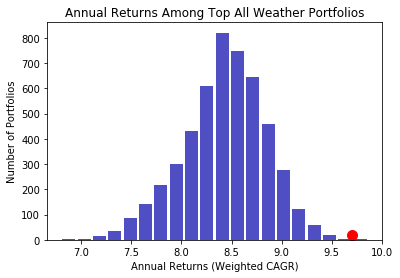

In [550]:
# Early exploration of whether 9% returns are common.  Needs a true hypothesis test: Is the mean of the data set 9?

count_above_9 = 0
for i in data_set['Estimated_Annual_Return']:
    if i > 9.7:
        count_above_9 = count_above_9 + 1

above_9_ratio = count_above_9/data_set.shape[0]*100

plt.hist(data_set['Estimated_Annual_Return'], bins = 20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.plot([9.7],[20], 'ro', markersize = 10)
plt.xlabel('Annual Returns (Weighted CAGR)')
plt.ylabel('Number of Portfolios')
plt.title('Annual Returns Among Top All Weather Portfolios')
plt.show

print('Percentage of portfolios above 9% Annual Return: ' + str(above_9_ratio))

<function matplotlib.pyplot.show(*args, **kw)>

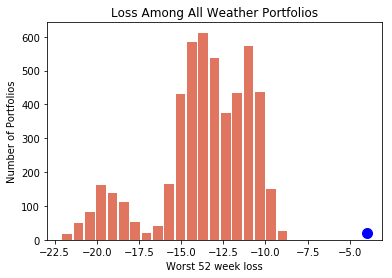

In [516]:
plt.hist(data_set['Worst_Year'], bins = 20, color='#D53C1C',
                            alpha=0.7, rwidth=0.85)

plt.plot([-4],[20], 'bo', markersize = 10)
plt.xlabel('Worst 52 week loss')
plt.ylabel('Number of Portfolios')
plt.title('Loss Among All Weather Portfolios')
plt.show

Text(0.5,1,'Density of All Weather Portfolios')

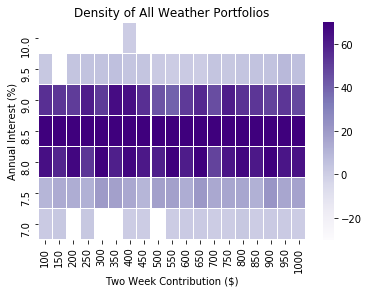

In [525]:
def set_grapher(df):

    graphing_set = df

    graphing_set['rounded_estimates'] = round(df['Estimated_Annual_Return']* 2)/2

    graphing_set.columns = ['Portfolio', 'Weeks', 'Two Week Contribution ($)', 'Worst Year', 
                    'Best Year', 'Estimated Return', 'Typical', 'Annual Interest (%)']

    grouped = graphing_set.groupby(['Annual Interest (%)', 'Two Week Contribution ($)'])['Estimated Return'].count()

    new_df = grouped.to_frame(name = 'count')
    new_df = new_df.unstack()
    new_df.columns = new_df.columns.droplevel()

    labels = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
    ax = sns.heatmap(new_df, annot=False, cmap = "Purples", vmin =-30, vmax = 70, linewidths = .1, xticklabels = labels)
    ax.invert_yaxis()

    return(ax)

ax = set_grapher(data_set)
ax.set_title('Density of All Weather Portfolios')


In [552]:
# This Cell explores the likelihood of an individual fund's presence in an AW portfolio and the likelihood
# of that portfolio having over 9% return vs the likelihood of it occurring in a portfolio with performance under 9%

over_9_df = data_set[data_set['Estimated_Annual_Return'] > 9]
under_9_df = data_set[data_set['Estimated_Annual_Return'] <= 9]
master_list = pd.DataFrame()


for j in range(over_9_df.shape[0]):
    funds = over_9_df.reset_index()['Portfolio']
    listed = funds[j].replace("'", "").replace(' ','').split(',')
    master_list = master_list.append(listed)

master_list.columns = ['Success_Index']
summary_over_9 = master_list['Success_Index'].value_counts()

master_list = pd.DataFrame()
for j in range(under_9_df.shape[0]):
    funds = under_9_df.reset_index()['Portfolio']
    listed = funds[j].replace("'", "").replace(' ','').split(',')
    master_list = master_list.append(listed)
    
master_list.columns = ['Failure_Index']
summary_under_9 = master_list['Failure_Index'].value_counts()


df_over_9 = summary_over_9.reset_index()
df_over_9['Success_Index'] = df_over_9['Success_Index']/over_9_df.shape[0]

df_under_9 = summary_under_9.reset_index()
df_under_9['Failure_Index'] = df_under_9['Failure_Index']/under_9_df.shape[0]

comparison_df = df_over_9.merge(df_under_9, how = 'outer', left_on = 'index', right_on = 'index')
comparison_df

recommended_funds = comparison_df[comparison_df['Success_Index'] > comparison_df['Failure_Index']]

recommended_funds


index  Success_Index  Failure_Index
0  VIGRX       0.769014       0.155651
1  WHOSX       0.478873       0.311948
2    DBC       0.453521       0.246071
3    IEF       0.377465       0.102260
5  SGGDX       0.270423       0.197847
6  INIVX       0.261972       0.191604
8    IEI       0.225352       0.117115
9  OPGSX       0.216901       0.193111

In [553]:
recommendation = "'VIGRX', 'IEF', 'WHOSX', 'SGGDX', 'DBC'"

data_set[data_set['Portfolio'] == recommendation]


Portfolio  Weeks_until_Rebalance  \
12    'VIGRX', 'IEF', 'WHOSX', 'SGGDX', 'DBC'                   32.0   
14    'VIGRX', 'IEF', 'WHOSX', 'SGGDX', 'DBC'                   49.0   
76    'VIGRX', 'IEF', 'WHOSX', 'SGGDX', 'DBC'                   41.0   
1071  'VIGRX', 'IEF', 'WHOSX', 'SGGDX', 'DBC'                   22.0   

      Biweekly_Contribution  Worst_Year  Best_Year  Estimated_Annual_Return  \
12                    350.0       -9.89      16.78                     9.49   
14                    200.0       -9.12      16.76                     9.47   
76                    400.0       -9.81      16.94                     9.25   
1071                  650.0       -9.72      17.37                     8.75   

     Typical_Returns  
12    -6.17 to 12.33  
14    -6.19 to 12.15  
76    -6.21 to 11.84  
1071   -6.28 to 11.6

In [554]:
# Let's explore the top performing portfolio further to see what variations in contribution amount and rebalance
# period optimize its behavior.  

recommend = recommendation.replace("'", "").replace(',', '').split()

stock = recommend[0]
itb = recommend[1]
ltb = recommend[2]
gold = recommend[3]
commod = recommend[4]

listing = []
for i in range(1,5):
    interval = i*15
    for j in range(1,10):
        contribution = j*100
        f_df, b_df, CAGR_mean, CAGR_range, ident, years = specific_tester(
            stock, itb, ltb, gold, commod, .3, .4, .15, .075, .075, contribution, interval)
        number_of_weeks = f_df.shape[0]
        summaries = []

        for k in range(0, number_of_weeks-52):
            selection = f_df.iloc[k:k+51, :]
            CAGR, identities, length = p_summary(selection, ident, 1)
            summaries = np.append(summaries, round(CAGR*100,2))

        modified = reject_outliers(summaries)
        CAGR_range =  str(round(np.percentile(modified, 5), (2))) + ' to ' + str(round(np.percentile(modified,95), 2))
    
    
        listing.append([i*15, j*100, CAGR_mean, min(modified), max(modified), CAGR_range])

        placeholder = pd.DataFrame(listing, columns = ['Weeks_to_Rebalance', 'Biweekly_Contribution', 'Estimated_Return', 'Worst_Year', 'Best_Year', 'Typical_Returns'])


/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [468]:
# A selection of the analysis in the last cell is rewritten here, to highlight the findings.

recommend = recommendation.replace("'", "").replace(',', '').split()

stock = recommend[0]
itb = recommend[1]
ltb = recommend[2]
gold = recommend[3]
commod = recommend[4]


listing = []
for i in range(1,7):
    interval = i*10
    
    contribution = 100
    f_df, b_df, CAGR_mean, CAGR_range, ident, years = specific_tester(
        stock, itb, ltb, gold, commod, .3, .4, .15, .075, .075, contribution, interval)
    number_of_weeks = f_df.shape[0]
    summaries = []

    for k in range(0, number_of_weeks-52):
        selection = f_df.iloc[k:k+51, :]
        CAGR, identities, length = p_summary(selection, ident, 1)
        summaries = np.append(summaries, round(CAGR*100,2))

    modified = reject_outliers(summaries)
    CAGR_range =  str(round(np.percentile(modified, 5), (2))) + ' to ' + str(round(np.percentile(modified,95), 2))
    
    
    listing.append([i*10, j*100, CAGR_mean, min(modified), max(modified), CAGR_range])


    placeholder = pd.DataFrame(listing, columns = ['Weeks_to_Rebalance', 'Biweekly_Contribution', 'Estimated_Return', 'Worst_Year', 'Best_Year', 'Typical_Returns'])
            
placeholder.sort_values('Estimated_Return', ascending = False)

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Weeks_to_Rebalance  Biweekly_Contribution  Estimated_Return  Worst_Year  \
3                  40                    100              9.99       -9.33   
2                  30                    100              9.85       -9.43   
1                  20                    100              9.79       -9.61   
4                  50                    100              9.75       -9.44   
5                  60                    100              9.74       -9.71   
0                  10                    100              9.70      -10.01   

   Best_Year Typical_Returns  
3      18.62  -5.81 to 12.41  
2      18.30  -6.07 to 12.12  
1      18.21  -6.11 to 12.01  
4      15.59  -6.16 to 11.92  
5      15.37  -6.06 to 11.22  
0      16.85  -6.54 to 11.82

In [ ]:
# Here, additional variations of the same analysis above are given for portfolios of different propotion.  
# First, we have a stock-heavy  60%, 10%, 10%, 10%, 10% scheme.

In [526]:
data_set = pd.read_csv('5000 60_10_10_10_10 portfolios')
data_set = data_set[['Portfolio', 'Weeks_until_Rebalance', 'Biweekly_Contribution', 'Worst_Year', 
                   'Best_Year', 'Estimated_Annual_Return', 'Typical_Returns']]
data_set = data_set.sort_values(['Estimated_Annual_Return', 'Biweekly_Contribution', 'Worst_Year'], 
                                ascending = [False, True, True])

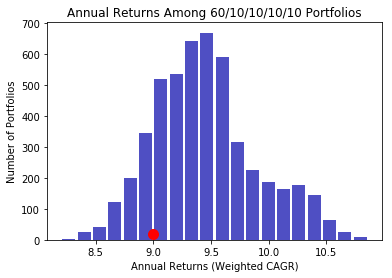

In [527]:
# This Cell develops return visualizations for 5000 portfolios with the distribution scheme .60, .10, .10, .10, .10
count_above_9 = 0
for i in data_set['Estimated_Annual_Return']:
    if i > 9:
        count_above_9 = count_above_9 + 1
count_above_9/data_set.shape[0]*100

plt.hist(data_set['Estimated_Annual_Return'], bins = 20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.plot([9],[20], 'ro', markersize = 10)
plt.xlabel('Annual Returns (Weighted CAGR)')
plt.ylabel('Number of Portfolios')
plt.title('Annual Returns Among 60/10/10/10/10 Portfolios')
plt.show

most_worst = str(min(data_set['Worst_Year']))
least_worst = str(max(data_set['Worst_Year']))


<function matplotlib.pyplot.show(*args, **kw)>

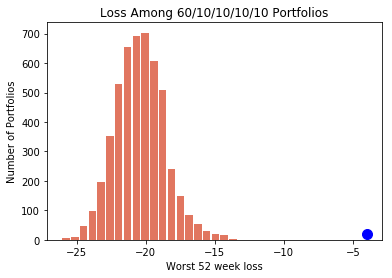

In [528]:
# This cell develops loss visualizations for a portfolio with distribution scheme .60, .10, .10, .10, .10

plt.hist(data_set['Worst_Year'], bins = 20, color='#D53C1C',
                            alpha=0.7, rwidth=0.85)

plt.plot([-4],[20], 'bo', markersize = 10)
plt.xlabel('Worst 52 week loss')
plt.ylabel('Number of Portfolios')
plt.title('Loss Among 60/10/10/10/10 Portfolios')
plt.show

Text(0.5,1,'Density of 60/10/10/10/10 Portfolios')

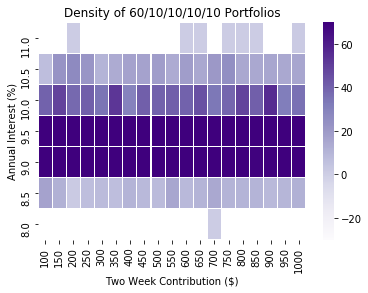

In [529]:
# Heat map for number of portfolios with distribution scheme .60, .10, .10, .10, .10

ax = set_grapher(data_set)
ax.set_title('Density of 60/10/10/10/10 Portfolios')

In [436]:
# This Cell explores the likelihood of an individual fund's presence in 60/10/10/10/10 portfolio and the likelihood
# of that portfolio having over 10.25% return.

over_10_df = data_set[data_set['Estimated_Annual_Return'] > 10.25]
under_10_df = data_set[data_set['Estimated_Annual_Return'] <= 10.25]
master_list = pd.DataFrame()


for j in range(over_10_df.shape[0]):
    funds = over_10_df.reset_index()['Portfolio']
    listed = funds[j].replace("'", "").replace(' ','').split(',')
    master_list = master_list.append(listed)

master_list.columns = ['Success_Index']
summary_over_10 = master_list['Success_Index'].value_counts()

master_list = pd.DataFrame()
for j in range(under_10_df.shape[0]):
    funds = under_10_df.reset_index()['Portfolio']
    listed = funds[j].replace("'", "").replace(' ','').split(',')
    master_list = master_list.append(listed)
    
master_list.columns = ['Failure_Index']
summary_under_10 = master_list['Failure_Index'].value_counts()


df_over_10 = summary_over_10.reset_index()
df_over_10['Success_Index'] = df_over_10['Success_Index']/over_10_df.shape[0]

df_under_10 = summary_under_10.reset_index()
df_under_10['Failure_Index'] = df_under_10['Failure_Index']/under_10_df.shape[0]

comparison_df = df_over_10.merge(df_under_10, how = 'outer', left_on = 'index', right_on = 'index')
comparison_df

recommended_funds = comparison_df[comparison_df['Success_Index'] > comparison_df['Failure_Index']]

recommended_funds


index  Success_Index  Failure_Index
0   VIGRX       1.000000       0.150729
1     DBC       0.422619       0.241424
2   WHOSX       0.383929       0.324614
4   SGGDX       0.303571       0.185892
6   INIVX       0.285714       0.194254
7   OPGSX       0.241071       0.188036
8     IEF       0.208333       0.123499
12    IEI       0.163690       0.118782
14    IPE       0.136905       0.130146
15   IGIB       0.119048       0.116638

In [459]:
recommendation = "'VIGRX', 'IEF', 'WHOSX', 'SGGDX', 'DBC'"

data_set[data_set['Portfolio'] == recommendation]

recommend = recommendation.replace("'", "").replace(',', '').split()

stock = recommend[0]
itb = recommend[1]
ltb = recommend[2]
gold = recommend[3]
commod = recommend[4]


listing = []
for i in range(1,5):
    interval = i*10
    for j in range(1,15):
        contribution = j*100
        f_df, b_df, CAGR_mean, CAGR_range, ident, years = specific_tester(
            stock, itb, ltb, gold, commod, .6, .1, .1, .1, .1, contribution, interval)
        number_of_weeks = f_df.shape[0]
        summaries = []

        for k in range(0, number_of_weeks-52):
            selection = f_df.iloc[k:k+51, :]
            CAGR, identities, length = p_summary(selection, ident, 1)
            summaries = np.append(summaries, round(CAGR*100,2))

        modified = reject_outliers(summaries)
        CAGR_range =  str(round(np.percentile(modified, 5), (2))) + ' to ' + str(round(np.percentile(modified,95), 2))
    
    
        listing.append([i*10, j*100, CAGR_mean, min(modified), max(modified), CAGR_range])

        placeholder = pd.DataFrame(listing, columns = ['Weeks_to_Rebalance', 'Biweekly_Contribution', 'Estimated_Return', 'Worst_Year', 'Best_Year', 'Typical_Returns'])
            
placeholder.head()

/Users/nina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Weeks_to_Rebalance  Biweekly_Contribution  Estimated_Return  Worst_Year  \
0                  10                    100             10.78      -17.32   
1                  10                    200             10.78      -17.32   
2                  10                    300             10.78      -17.32   
3                  10                    400             10.78      -17.32   
4                  10                    500             10.78      -17.32   

   Best_Year Typical_Returns  
0      29.81  -4.61 to 21.52  
1      29.81  -4.61 to 21.52  
2      29.81  -4.61 to 21.52  
3      29.81  -4.61 to 21.52  
4      29.81  -4.61 to 21.52

In [ ]:
# Secondly, we have a less stock heavy scheme of 15% stock, 35% intermediate bonds, 
# 25% long term bonds, 12.5% gold, and 12.5% commodities.
# Interestingly enough, it is often suggested that retirees hold more of their portfolios in bonds
# However, the losses during a downturn are still quite ugly despite how common that advice is given.

In [533]:
data_set = pd.read_csv('5000 15_35_25_12.5_12.5 portfolios')
data_set = data_set[['Portfolio', 'Weeks_until_Rebalance', 'Biweekly_Contribution', 'Worst_Year', 
                   'Best_Year', 'Estimated_Annual_Return', 'Typical_Returns']]
data_set = data_set.sort_values(['Estimated_Annual_Return', 'Biweekly_Contribution', 'Worst_Year'], 
                                ascending = [False, True, True])

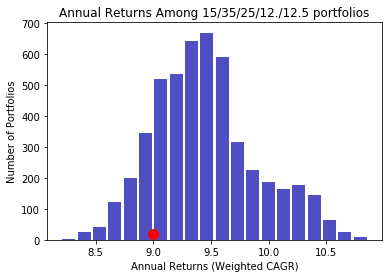

In [531]:
count_above_9 = 0
for i in data_set['Estimated_Annual_Return']:
    if i > 9:
        count_above_9 = count_above_9 + 1
count_above_9/data_set.shape[0]*100

plt.hist(data_set['Estimated_Annual_Return'], bins = 20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.plot([9],[20], 'ro', markersize = 10)
plt.xlabel('Annual Returns (Weighted CAGR)')
plt.ylabel('Number of Portfolios')
plt.title('Annual Returns Among 15/35/25/12./12.5 portfolios')
plt.show

most_worst = str(min(data_set['Worst_Year']))
least_worst = str(max(data_set['Worst_Year']))

#print('The Returns across the "15/35/25/12.5/12.5" portfolios in their worst 52 week period range from ' + most_worst + ' to ' + least_worst + '.' )

<function matplotlib.pyplot.show(*args, **kw)>

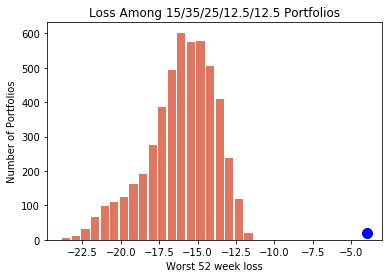

In [532]:
plt.hist(data_set['Worst_Year'], bins = 20, color='#D53C1C',
                            alpha=0.7, rwidth=0.85)

plt.plot([-4],[20], 'bo', markersize = 10)
plt.xlabel('Worst 52 week loss')
plt.ylabel('Number of Portfolios')
plt.title('Loss Among 15/35/25/12.5/12.5 Portfolios')
plt.show

Text(0.5,1,'Density of 15/35/25/12.5/12.5 Portfolios')

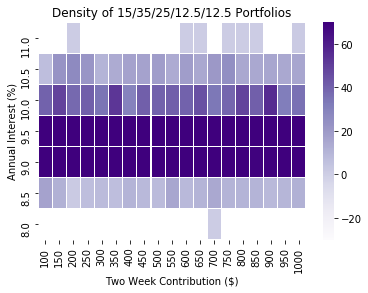

In [534]:

ax = set_grapher(data_set)
ax.set_title('Density of 15/35/25/12.5/12.5 Portfolios')

In [481]:
over_9_df = data_set[data_set['Estimated_Annual_Return'] > 9]
under_9_df = data_set[data_set['Estimated_Annual_Return'] <= 9]
master_list = pd.DataFrame()


for j in range(over_9_df.shape[0]):
    funds = over_9_df.reset_index()['Portfolio']
    listed = funds[j].replace("'", "").replace(' ','').split(',')
    master_list = master_list.append(listed)

master_list.columns = ['Success_Index']
summary_over_9 = master_list['Success_Index'].value_counts()

master_list = pd.DataFrame()
for j in range(under_9_df.shape[0]):
    funds = under_9_df.reset_index()['Portfolio']
    listed = funds[j].replace("'", "").replace(' ','').split(',')
    master_list = master_list.append(listed)
    
master_list.columns = ['Failure_Index']
summary_under_9 = master_list['Failure_Index'].value_counts()


df_over_9 = summary_over_9.reset_index()
df_over_9['Success_Index'] = df_over_9['Success_Index']/over_9_df.shape[0]

df_under_9 = summary_under_9.reset_index()
df_under_9['Failure_Index'] = df_under_9['Failure_Index']/under_9_df.shape[0]

comparison_df = df_over_9.merge(df_under_9, how = 'outer', left_on = 'index', right_on = 'index')
comparison_df

recommended_funds = comparison_df[comparison_df['Success_Index'] > comparison_df['Failure_Index']]

recommended_funds


index  Success_Index  Failure_Index
0   WHOSX       0.344053       0.243839
3     DBC       0.275479       0.133593
8   USERX       0.218018       0.147860
9   INIVX       0.217309       0.107652
10  SGGDX       0.212343       0.092088
11  OPGSX       0.206432       0.110246
17    IEF       0.138567       0.077821
18    IPE       0.132183       0.121920
19    IEI       0.128163       0.086900
20    BIV       0.127690       0.111543
21    ITE       0.124616       0.093385

In [ ]:
# Since the returns and losses are not superior to the All Weather portfolio (30/40/15/7.5/7.5), 
# Additional recommendations will not be made using the above data.